# **Other Probability Distributions**

In [4]:
import scipy.stats as st
import math
from math import sqrt, ceil
import numpy as np
from numpy.random import normal
from matplotlib import pyplot
from scipy.special import logit, expit
from scipy.stats import norm, rv_continuous, logistic, fisk

### **Logistic Distribution**

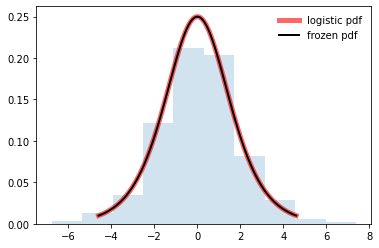

In [3]:
fig, ax = pyplot.subplots(1, 1)
mean, var, skew, kurt = logistic.stats(moments='mvsk')

# Creating a random of sample based on logistic distribution

start = logistic.ppf(0.01)
stop = logistic.ppf(0.99)
x = np.linspace(start,stop, 100)

# Displaying the logistic pdf
ax.plot(x, logistic.pdf(x), 'r-', lw=5, alpha=0.6, label='logistic pdf')

# initializing logistic RV
rv = logistic()

# Displaying the frozen pdf (with fixed shape, location and scale parameters) based on the RV generated
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# Generating random numbers (based on logistic dist)
r = logistic.rvs(size=1000)

# Displaying histogram for comparision
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
pyplot.show()

### **Log-Logistic**

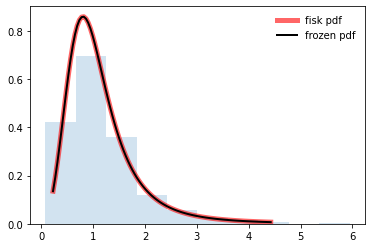

In [5]:
fig, ax = pyplot.subplots(1, 1)
c = 3.09
mean, var, skew, kurt = fisk.stats(c, moments='mvsk')

# Making an array of 100 numbers based on log-logistic dist
start = fisk.ppf(0.01,c)
stop = fisk.ppf(0.99, c)
x = np.linspace(start,stop, 100)

# plotting log-logistic pdf 
ax.plot(x, fisk.pdf(x, c),'r-', lw=5, alpha=0.6, label='fisk pdf')

# Initiaizing a log-logistic RV
rv = fisk(c)

# Displaying the frozen pdf (with fixed shape, location and scale parameters) based on the RV generated
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# Generating random numbers
r = fisk.rvs(c, size=1000)

# Making a histogram for better comparision
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
pyplot.show()

### **Logit Distribution**

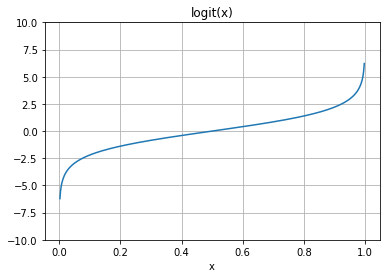

In [6]:
# Creating a sample
x = np.linspace(0, 1, 500)

# Getting logit values for the sample above
y = logit(x)

# Plotting
pyplot.plot(x, y)
pyplot.grid()
pyplot.ylim(-10, 10)
pyplot.xlabel('x')
pyplot.title('logit(x)')
pyplot.show()

### **Logit-Normal Distribution**


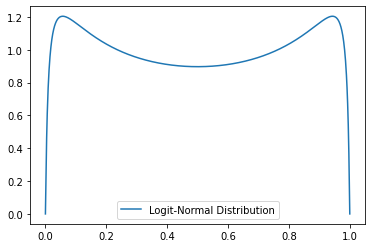

In [7]:
# Creating a class for logit-Nomral Distribution which accepts a continous RV as its parameter
class LogitNormal(rv_continuous):

# constructor creates an object of LogitNormal class with scale = 1 and loc = 0 (required values for normal distribution)
    def __init__(self, scale=1, loc=0):
        super().__init__(self)
        self.scale = scale
        self.loc = loc

# The function _pdf accepts the object along with a sample as its parameters. The logit function is applied to sample values with scale of [1/p(1-p)] and later norm.pdf distributes the resulting logit distributed values to normal distribution
    def _pdf(self, x):
        return norm.pdf(logit(x), loc=self.loc, scale=self.scale)/(x*(1-x))


fig, ax = pyplot.subplots()

# creating a sample with start and stop values
start = 10e-10
stop = 0.999999999
values = np.linspace(start, stop, 1000)
sigma, mu = 1.78, 0
ax.plot(values, LogitNormal(scale=sigma, loc=mu).pdf(values), label='Logit-Normal Distribution')
ax.legend()
fig.show()